# Time Series Analysis using Vector Autoregression¶
Vector autoregression (VAR) is a statistical model for multivariate time series analysis, especially in a time series where the variables have a relationship that affects each other to time. VAR models are different from univariate autoregressive models because they allow analysis and make predictions on multivariate time series data. VAR models are often used in economics and weather forecasting.
Basic requirements to use the VAR model are :

* Time series with at least two variables.
* Relationship between variables.
<br>
It is considered an autoregressive model because the predictions made by the model are dependent on the past values, which means that each observation is modelled as the function of its lagged value.

## What is the Difference between ARIMA and VAR
The basic difference between the ARIMA family and VAR models is that all the ARIMA models are used for univariate time series, where the VAR models work with multivariate time series. <br><br>
In addition, ARIMA models are unidirectional models, which means that the dependent variables are influenced by their past or lag values itself, where VAR is a bi-directional model, which means a dependent variable is affected by its past value or by another variable’s value or influenced by both of the things.<br><br> The basic difference between the ARIMA family and VAR models is that all the ARIMA models are used for univariate time series, where the VAR models work with multivariate time series. In addition, ARIMA models are unidirectional models, which means that the dependent variables are influenced by their past or lag values itself, where VAR is a bi-directional model, which means a dependent variable is affected by its past value or by another variable’s value or influenced by both of the things. 

## What are the limitations of VAR?
The Vector Autoregression (VAR) model is a powerful tool for analyzing the interrelationships among multiple time series variables. However, like any statistical model, VAR has its limitations. Here are some of the limitations of VAR:

1. <b>Causality:</b> VAR does not provide any information on causality between variables. The relationships among variables are based on correlation and not causation. It is important to note that correlation does not imply causation.

2. <b>Stationarity:</b> VAR assumes that the time series variables are stationary, which means that the statistical properties of the series do not change over time. If the time series are non-stationary, the results from VAR may be biased.

3. <b>Model selection:</b> VAR requires choosing the number of lags to include in the model, and this can be challenging. Including too few lags can result in a model that is too simple and does not capture the complexity of the data, while including too many lags can result in a model that is too complex and overfits the data.

4. <b>Large number of variables:</b> VAR becomes computationally intensive as the number of variables increases. It can be challenging to estimate a VAR model with a large number of variables, especially if the series are highly correlated.

5. <b>Forecasting:</b> VAR assumes that the future values of the time series variables are a linear combination of their past values. This may not always be the case, especially if the series are influenced by external factors that are not captured by the model.

Overall, VAR can be a useful tool for analyzing the interrelationships among time series variables, but it is important to be aware of its limitations and to carefully consider the assumptions of the model before applying it to real-world data.

##  What is dickey fuller in VAR?
The Dickey-Fuller test is a statistical test used to determine if a time series data set is stationary or not. In the context of VAR (Vector Autoregression) modeling, the Dickey-Fuller test can be used to test for the stationarity of each variable in the system.
<br><br>
A VAR model assumes that the variables are stationary, meaning that their statistical properties such as mean, variance and autocovariance remain constant over time. If the variables are not stationary, the model's forecasts may not be reliable. The Dickey-Fuller test helps to determine whether a variable is stationary or not by testing the null hypothesis that the variable has a unit root (i.e., is non-stationary) against the alternative hypothesis that it does not have a unit root (i.e., is stationary).

## What should we do if data is not stationary?
If our data is not stationary, we need to make it stationary before we can apply a time series model such as VAR. There are several techniques that can be used to make time series data stationary, including:

* Differencing: We can take first or second difference of the series to make it stationary.

* Logarithmic transformation: We can take the natural logarithm of the series to make it stationary.

* Seasonal adjustment: If there is a seasonal component in the series, we can adjust for it by removing the seasonal variation.

* Trend removal: We can remove the trend component from the series to make it stationary.

In [14]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse,rmse

In [13]:
import numpy as np
import pandas as pd

# visualization import
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# define the plot size default
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)

In [12]:
df = pd.read_csv('/content/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('/content/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [15]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [16]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [17]:
df = df.join(sp)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [18]:
df.isna().sum()

Money       0
Spending    0
dtype: int64

In [19]:
len(df)

252

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Money     252 non-null    float64
 1   Spending  252 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


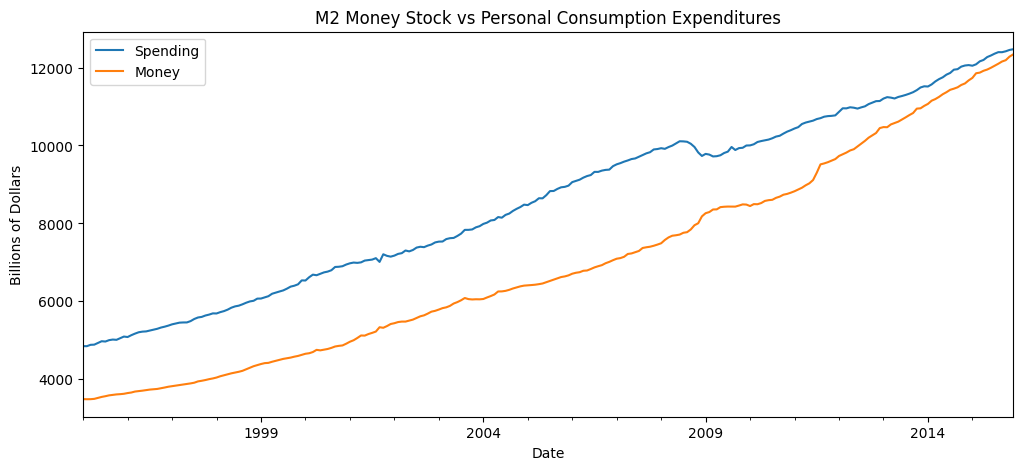

In [21]:
title = 'M2 Money Stock vs Personal Consumption Expenditures'
ylabel = 'Billions of Dollars'
xlabel='' #xlabel is not required. The datetime indes will be taken as the points on the x axis

ax = df['Spending'].plot(legend=True,title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel)
df['Money'].plot(legend=True);

In [22]:
def dickey_fuller(series,title='Your Dataset'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {title}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')
        

In [23]:
dickey_fuller(df['Money'],title='Money')

Augmented Dickey Fuller Test for the dataset Money
ADF test statistics       4.239022
p-value                   1.000000
#lags                     4.000000
#observations           247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [24]:
dickey_fuller(df['Spending'],title='Spending')

Augmented Dickey Fuller Test for the dataset Spending
ADF test statistics       0.149796
p-value                   0.969301
#lags                     3.000000
#observations           248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


So both the Money and the Spending is non stationary. We will take the first order difference of the entire dataframe and re-run the dickey fuller test and store it in a separate dataframe so that the original dataframe is retained.

In [25]:
df_diff = df.diff() #

In [26]:
df_diff.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


#### There is NaN introduced due to the first order difference. So lets drop this missing value row.

In [27]:
df_diff = df_diff.dropna()

In [28]:
dickey_fuller(df_diff['Money'],title='Money 1st Order Diff')

Augmented Dickey Fuller Test for the dataset Money 1st Order Diff
ADF test statistics      -2.057404
p-value                   0.261984
#lags                    15.000000
#observations           235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [29]:
dickey_fuller(df_diff['Spending'],title='Spending 1st Order Diff')

Augmented Dickey Fuller Test for the dataset Spending 1st Order Diff
ADF test statistics    -7.226974e+00
p-value                 2.041027e-10
#lags                   2.000000e+00
#observations           2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


#### Money feature is still not stationary while Spending is stationary after the first order difference. I will take the second order difference of both the series so that they retain the same shape. Rerun the dickey fuller test for stationarity.

In [30]:
df_diff = df_diff.diff().dropna()
dickey_fuller(df_diff['Money'],title='Money 2nd Order Diff')

Augmented Dickey Fuller Test for the dataset Money 2nd Order Diff
ADF test statistics    -7.077471e+00
p-value                 4.760675e-10
#lags                   1.400000e+01
#observations           2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [31]:
dickey_fuller(df_diff['Spending'],title='Spending 2nd Order Diff')

Augmented Dickey Fuller Test for the dataset Spending 2nd Order Diff
ADF test statistics    -8.760145e+00
p-value                 2.687900e-14
#lags                   8.000000e+00
#observations           2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [32]:
df_diff.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [33]:

len(df_diff)

250

In [34]:
nobs = 12
train = df_diff[:-nobs]
test = df_diff[-nobs:]

In [35]:
len(train), len(test)

(238, 12)

In [36]:
p = [1,2,3,4,5,6,7]  # try with list of 7 p values

for i in p:
    model = VAR(train)
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()

VAR Order 1
AIC 14.178610495220896
BIC 14.266409486135709

VAR Order 2
AIC 13.955189367163705
BIC 14.101961901274958

VAR Order 3
AIC 13.849518291541038
BIC 14.055621258341116

VAR Order 4
AIC 13.827950574458281
BIC 14.093744506408875

VAR Order 5
AIC 13.787300344609642
BIC 14.113149468980653

VAR Order 6
AIC 13.799076756885807
BIC 14.185349048538066

VAR Order 7
AIC 13.797638727913972
BIC 14.244705963046671



In [37]:
model.endog_names

['Money', 'Spending']

In [38]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 04, May, 2023
Time:                     18:40:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [39]:
lag_order = results.k_ar
lag_order

5

In [40]:
z = results.forecast(y=train.values[-lag_order:],steps = 12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [41]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [42]:
idx = pd.date_range(start='1/1/2015',periods=12,freq='MS')
df_forecast = pd.DataFrame(z,index=idx,columns=['Money2D','Spending2D'])

In [43]:
df_forecast[:5]

,Money2D,Spending2D
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365


## Invert the Transformations
The forecasted values represent the 2nd order difference forecast. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

In [44]:
df_forecast['Money1D'] = (df['Money'].iloc[-nobs-1] - df['Money'].iloc[-nobs-2]) + df_forecast['Money2D'].cumsum()

In [45]:
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1D'].cumsum()

In [46]:
df_forecast

,Money2D,Spending2D,Money1D,MoneyForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371
2015-04-01,-2.602233,5.479458,55.450728,11903.639099
2015-05-01,4.228557,-2.443365,59.679285,11963.318384
2015-06-01,1.559393,0.387639,61.238678,12024.557062
2015-07-01,-0.998410,3.883680,60.240268,12084.797331
2015-08-01,0.364510,-2.356101,60.604779,12145.402109
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261
2015-10-01,0.225877,0.786927,59.620028,12264.416289


In [47]:
df_forecast['Spending1D'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending2D'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1D'].cumsum()

In [48]:
df_forecast

,Money2D,Spending2D,Money1D,MoneyForecast,Spending1D,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


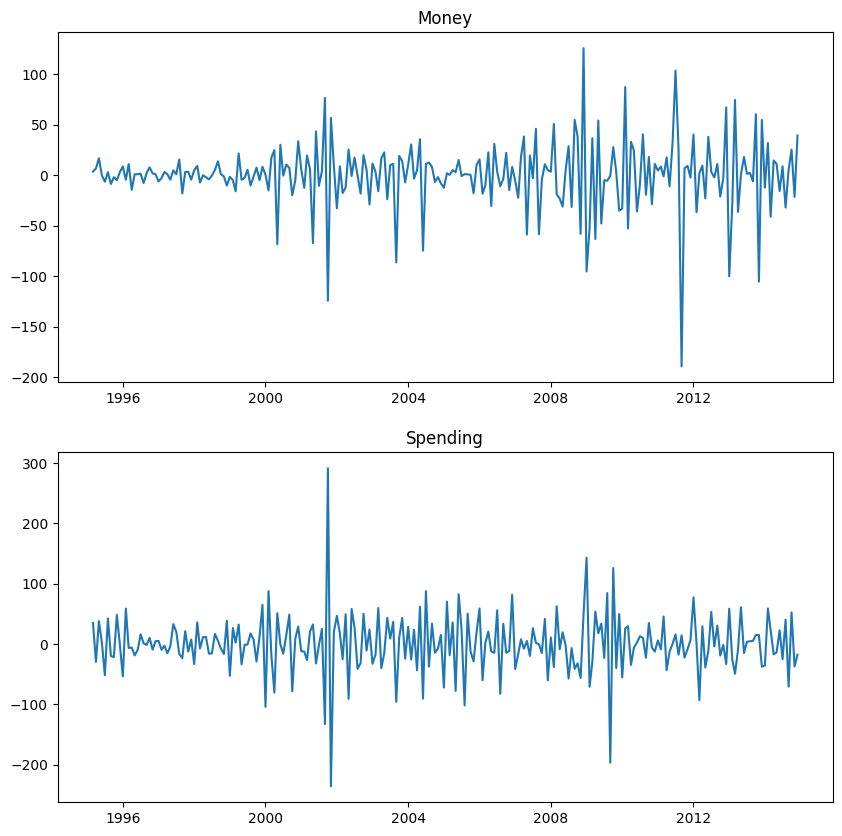

In [49]:
results.plot();

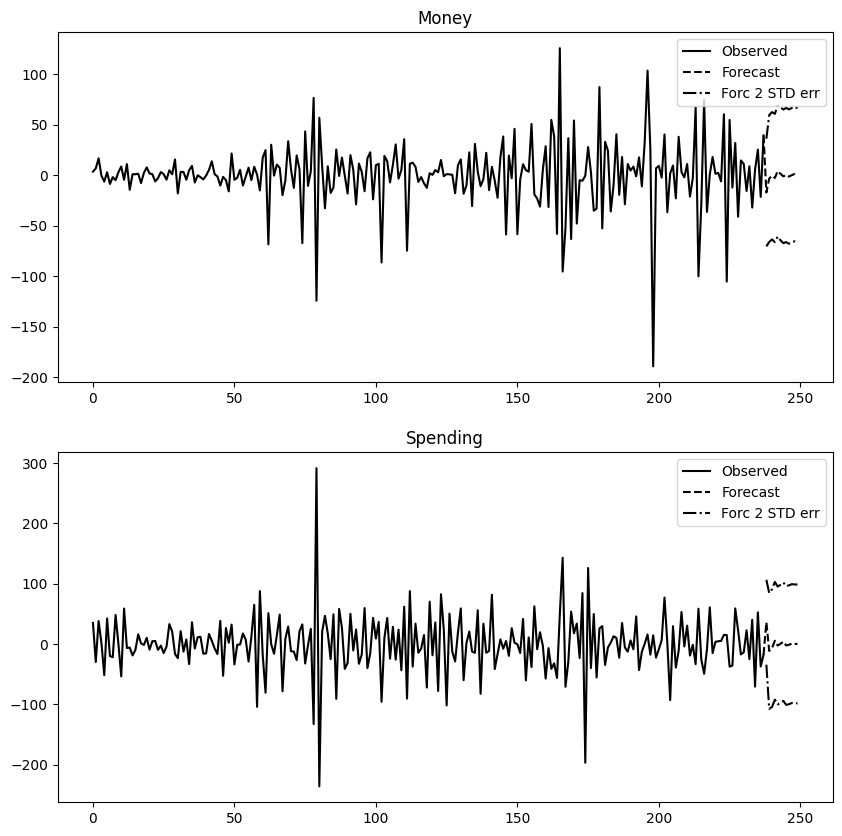

In [50]:
results.plot_forecast(12);

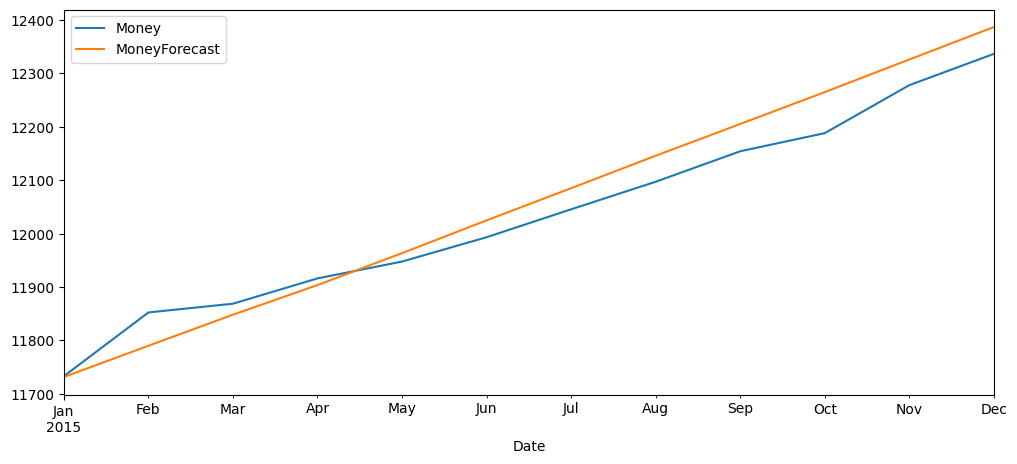

In [51]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

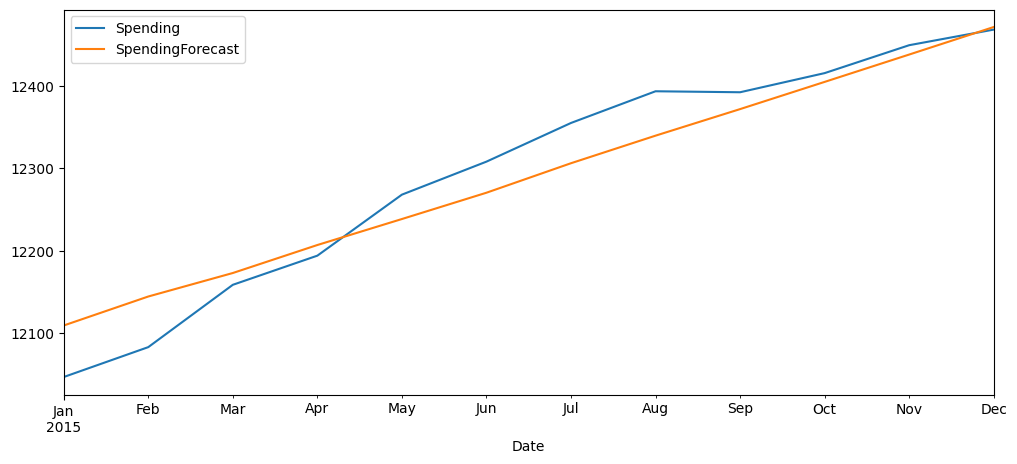

In [52]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

In [53]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 43.710


In [54]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 37.001
